BAIXAR relatórios:

REGISTRO MENSAL DE ATENDIMENTOS DOS CRAS (RMA) – FORMULÁRIO DO CRAS

Variáveis do Bloco II – Atendimentos individualizados realizados no CRAS

C1 = Quantidade total de atendimentos particularizados realizados no CRAS no mês de referência


Código para baixar os endereços dos arquivos na página

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import os
import plotly.io as pio
import math
from geojson_rewind import rewind

import streamlit as st

In [2]:
url='https://aplicacoes.mds.gov.br/sagi/dicivip_datain/ckfinder/userfiles/files/RMA_CRAS_Criterios_2022_divulga%C3%A7%C3%A3o_27_03_23.xlsx'

In [3]:
tabelafinal = pd.read_excel(url,sheet_name="Base tratada")

In [4]:
tabelafinal.head(2)

,data,mes_referencia,ano,mes,nome_unidade,NU_IDENTIFICADOR,endereco,municipio,uf,a1,...,d2_original,d3_original,d4_original,d5_original,d6_original,d7_original,d8_original,geral,Ind_duplicidade,trimestre
0,2022-01-01,01-01-2022,2022,1,'CRAS CENTRO DE REFERENCIA DE ASSISTENCIA SOCIAL','11000120396','RUA MARANHAO 3300 - PRINCESA ISABEL','ALTA FLORESTA DOESTE','RO',30.0,...,0,0,0,0,0,0,0,1,Caso principal,1
1,2022-02-01,01-02-2022,2022,2,'CRAS CENTRO DE REFERENCIA DE ASSISTENCIA SOCIAL','11000120396','RUA MARANHAO 3300 - PRINCESA ISABEL','ALTA FLORESTA DOESTE','RO',51.0,...,0,0,0,90,31,0,0,1,Caso principal,1


In [5]:
tabelafinal.columns

Index(['data', 'mes_referencia', 'ano', 'mes', 'nome_unidade',
       'NU_IDENTIFICADOR', 'endereco', 'municipio', 'uf', 'a1', 'a2', 'b1',
       'b2', 'b3', 'b4', 'b5', 'b6', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'd1',
       'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'IBGE', 'c7', 'c8', 'c9', 'd8',
       'IBGE7', 'Nome_UF', 'Região', 'Município', 'Pop_total_2010',
       'Pop_Urbana2010', 'Pop_Rural2010', 'areaKm2', 'Porte_pop2010',
       'a1_original', 'a2_original', 'b1_original', 'b2_original',
       'b3_original', 'b4_original', 'b5_original', 'b6_original',
       'c1_original', 'c2_original', 'c3_original', 'c4_original',
       'c5_original', 'c6_original', 'c7_original', 'c8_original',
       'c9_original', 'd1_original', 'd2_original', 'd3_original',
       'd4_original', 'd5_original', 'd6_original', 'd7_original',
       'd8_original', 'geral', 'Ind_duplicidade', 'trimestre'],
      dtype='object')

In [6]:
dados_municipio=tabelafinal[['municipio', 'uf', 'IBGE','IBGE7','Nome_UF', 'Região', 'Município', 'Pop_total_2010', 'Pop_Urbana2010', 'Pop_Rural2010', 'areaKm2', 'Porte_pop2010']]

In [7]:
dados_municipio=dados_municipio.drop_duplicates(subset=['municipio','uf','IBGE','IBGE7'], keep='last')

In [8]:
dados_municipio

,municipio,uf,IBGE,IBGE7,Nome_UF,Região,Município,Pop_total_2010,Pop_Urbana2010,Pop_Rural2010,areaKm2,Porte_pop2010
11,'ALTA FLORESTA DOESTE','RO',110001,1100015,11,1,Alta Floresta D'Oeste,24392,13970,10422,7067.025,2
23,'ARIQUEMES','RO',110002,1100023,11,1,Ariquemes,90353,76525,13828,4426.571,3
35,'CABIXI','RO',110003,1100031,11,1,Cabixi,6313,2693,3620,1314.353,1
47,'CACOAL','RO',110004,1100049,11,1,Cacoal,78574,61921,16653,3792.948,3
59,'CEREJEIRAS','RO',110005,1100056,11,1,Cerejeiras,17029,14419,2610,2783.300,1
...,...,...,...,...,...,...,...,...,...,...,...,...
98818,'VIANOPOLIS','GO',522200,5222005,52,5,Vianópolis,12548,9170,3378,954.284,1
98829,'VICENTINOPOLIS','GO',522205,5222054,52,5,Vicentinópolis,7371,6321,1050,737.255,1
98841,'VILA BOA','GO',522220,5222203,52,5,Vila Boa,4735,3502,1233,1060.172,1
98865,'VILA PROPICIO','GO',522230,5222302,52,5,Vila Propício,5145,1504,3641,2181.583,1


Porte do municipio

In [9]:
url='https://blog.mds.gov.br/redesuas/wp-content/uploads/2018/06/Lista_Munic%C3%ADpios_com_IBGE_Brasil_Versao_CSV.csv'
porte=pd.read_csv(url, sep=";", encoding='Latin-1')

In [10]:
porte=porte[['IBGE','IBGE7','UF','Município','Região','População 2010','Porte']]

In [11]:
porte.head()

,IBGE,IBGE7,UF,Município,Região,População 2010,Porte
0,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II
1,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio
2,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I
3,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio
4,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I


In [12]:
Dados_municipio_porte = pd.merge(porte, dados_municipio, how = 'left', 
                                 right_on=['IBGE7',],
                                 left_on=['IBGE7',])

In [13]:
Dados_municipio_porte.sort_values(by="IBGE_y")

,IBGE_x,IBGE7,UF,Município_x,Região_x,População 2010,Porte,municipio,uf,IBGE_y,Nome_UF,Região_y,Município_y,Pop_total_2010,Pop_Urbana2010,Pop_Rural2010,areaKm2,Porte_pop2010
0,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II,'ALTA FLORESTA DOESTE','RO',110001.0,11.0,1.0,Alta Floresta D'Oeste,24392.0,13970.0,10422.0,7067.025,2.0
1,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio,'ARIQUEMES','RO',110002.0,11.0,1.0,Ariquemes,90353.0,76525.0,13828.0,4426.571,3.0
2,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I,'CABIXI','RO',110003.0,11.0,1.0,Cabixi,6313.0,2693.0,3620.0,1314.353,1.0
3,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio,'CACOAL','RO',110004.0,11.0,1.0,Cacoal,78574.0,61921.0,16653.0,3792.948,3.0
4,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I,'CEREJEIRAS','RO',110005.0,11.0,1.0,Cerejeiras,17029.0,14419.0,2610.0,2783.300,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,431700,4317004,RS,Santana da Boa Vista,Região Sul,8242.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4976,431725,4317251,RS,Santa Tereza,Região Sul,1720.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5056,432149,4321493,RS,Toropi,Região Sul,2952.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5076,432234,4322343,RS,Ubiretama,Região Sul,2296.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Municipios não encontrados no RMA 2022

In [14]:
MuncipiosFalta=Dados_municipio_porte[Dados_municipio_porte['municipio'].isna()]

In [15]:
MuncipiosFalta

,IBGE_x,IBGE7,UF,Município_x,Região_x,População 2010,Porte,municipio,uf,IBGE_y,Nome_UF,Região_y,Município_y,Pop_total_2010,Pop_Urbana2010,Pop_Rural2010,areaKm2,Porte_pop2010
575,210730,2107308,MA,Nova Iorque,Região Nordeste,4590.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,210945,2109452,MA,Raposa,Região Nordeste,26327.0,Pequeno II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701,220196,2201960,PI,Brasileira,Região Nordeste,7966.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1662,270130,2701308,AL,Cajueiro,Região Nordeste,20409.0,Pequeno II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2230,293280,2932804,BA,Utinga,Região Nordeste,18173.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2356,311040,3110400,MG,Camacho,Região Sudeste,3154.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2709,314040,3140407,MG,Marmelópolis,Região Sudeste,2968.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3292,350230,3502309,SP,Anhembi,Região Sudeste,5653.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3342,350670,3506706,SP,Boa Esperança do Sul,Região Sudeste,13645.0,Pequeno I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3364,350860,3508603,SP,Cachoeira Paulista,Região Sudeste,30091.0,Pequeno II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
MuncipiosFalta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 575 to 5092
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IBGE_x          52 non-null     int64  
 1   IBGE7           52 non-null     int64  
 2   UF              52 non-null     object 
 3   Município_x     52 non-null     object 
 4   Região_x        52 non-null     object 
 5   População 2010  51 non-null     float64
 6   Porte           52 non-null     object 
 7   municipio       0 non-null      object 
 8   uf              0 non-null      object 
 9   IBGE_y          0 non-null      float64
 10  Nome_UF         0 non-null      float64
 11  Região_y        0 non-null      float64
 12  Município_y     0 non-null      object 
 13  Pop_total_2010  0 non-null      float64
 14  Pop_Urbana2010  0 non-null      float64
 15  Pop_Rural2010   0 non-null      float64
 16  areaKm2         0 non-null      float64
 17  Porte_pop2010   0 non-null      float6

In [17]:
RMA_mensal=tabelafinal.loc[:,['ano', 'mes', 'municipio', 'uf', 'c1', 'c1_original', 'IBGE','IBGE7']]

In [18]:
RMA_mensal.head(2)

,ano,mes,municipio,uf,c1,c1_original,IBGE,IBGE7
0,2022,1,'ALTA FLORESTA DOESTE','RO',1218.0,1218,110001,1100015
1,2022,2,'ALTA FLORESTA DOESTE','RO',1280.0,1280,110001,1100015


In [19]:
RMA_mensal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99154 entries, 0 to 99153
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ano          99154 non-null  int64  
 1   mes          99154 non-null  int64  
 2   municipio    99154 non-null  object 
 3   uf           99154 non-null  object 
 4   c1           96827 non-null  float64
 5   c1_original  99154 non-null  int64  
 6   IBGE         99154 non-null  int64  
 7   IBGE7        99154 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 6.1+ MB


In [20]:
RMA_m_2022=RMA_mensal[(RMA_mensal['ano']==2022)]

In [21]:
RMA_m_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99154 entries, 0 to 99153
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ano          99154 non-null  int64  
 1   mes          99154 non-null  int64  
 2   municipio    99154 non-null  object 
 3   uf           99154 non-null  object 
 4   c1           96827 non-null  float64
 5   c1_original  99154 non-null  int64  
 6   IBGE         99154 non-null  int64  
 7   IBGE7        99154 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 6.1+ MB


In [22]:
RMA_2022_0=RMA_m_2022.groupby(['ano','mes','municipio','uf','IBGE','IBGE7']).sum().reset_index()

In [23]:
RMA_2022_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64010 entries, 0 to 64009
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ano          64010 non-null  int64  
 1   mes          64010 non-null  int64  
 2   municipio    64010 non-null  object 
 3   uf           64010 non-null  object 
 4   IBGE         64010 non-null  int64  
 5   IBGE7        64010 non-null  int64  
 6   c1           64010 non-null  float64
 7   c1_original  64010 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.9+ MB


In [24]:
RMA_2022_soma=RMA_2022_0.groupby(['ano','municipio','uf','IBGE','IBGE7']).sum().reset_index()
RMA_2022_soma=RMA_2022_soma.rename(columns={'c1':'soma_c1', 'c1_original':'soma_c1_original', }).drop(columns={'mes'})
RMA_2022_media=RMA_2022_0.groupby(['ano','municipio','uf','IBGE','IBGE7']).mean().round(1).reset_index()
RMA_2022_media=RMA_2022_media.rename(columns={'c1':'media_c1', 'c1_original':'media_c1_original', }).drop(columns={'mes'})

In [25]:
RMA_2022_media.tail()

,ano,municipio,uf,IBGE,IBGE7,media_c1,media_c1_original
5513,2022,'XIQUE-XIQUE','BA',293360,2933604,345.3,345.3
5514,2022,'ZABELE','PB',251740,2517407,80.1,80.1
5515,2022,'ZACARIAS','SP',355715,3557154,76.8,76.8
5516,2022,'ZE DOCA','MA',211400,2114007,398.2,9728.2
5517,2022,'ZORTEA','SC',421985,4219853,192.2,192.2


In [26]:
RMA_2022_soma.tail()

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original
5513,2022,'XIQUE-XIQUE','BA',293360,2933604,4144.0,4144
5514,2022,'ZABELE','PB',251740,2517407,961.0,961
5515,2022,'ZACARIAS','SP',355715,3557154,922.0,922
5516,2022,'ZE DOCA','MA',211400,2114007,4779.0,116738
5517,2022,'ZORTEA','SC',421985,4219853,2306.0,2306


In [27]:
RMA_2022=pd.merge(RMA_2022_soma,RMA_2022_media, how = 'inner', 
                  right_on=['ano', 'municipio','IBGE7','IBGE','uf'],
                  left_on=['ano', 'municipio','IBGE7','IBGE','uf'])
RMA_2022.tail()

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original
5513,2022,'XIQUE-XIQUE','BA',293360,2933604,4144.0,4144,345.3,345.3
5514,2022,'ZABELE','PB',251740,2517407,961.0,961,80.1,80.1
5515,2022,'ZACARIAS','SP',355715,3557154,922.0,922,76.8,76.8
5516,2022,'ZE DOCA','MA',211400,2114007,4779.0,116738,398.2,9728.2
5517,2022,'ZORTEA','SC',421985,4219853,2306.0,2306,192.2,192.2


In [28]:
RMA_2022[(RMA_2022['IBGE']==530010)]

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original
746,2022,'BRASILIA','DF',530010,5300108,300262.0,300262,27296.5,27296.5


In [29]:
RMA_m_2022_CRAS=tabelafinal.loc[:,['ano', 'mes', 'municipio','NU_IDENTIFICADOR', 'uf', 'IBGE','IBGE7']]
RMA_m_2022_CRAS=RMA_m_2022_CRAS[(RMA_m_2022_CRAS['ano']==2022)]
RMA_m_2022_CRAS

,ano,mes,municipio,NU_IDENTIFICADOR,uf,IBGE,IBGE7
0,2022,1,'ALTA FLORESTA DOESTE','11000120396','RO',110001,1100015
1,2022,2,'ALTA FLORESTA DOESTE','11000120396','RO',110001,1100015
2,2022,3,'ALTA FLORESTA DOESTE','11000120396','RO',110001,1100015
3,2022,4,'ALTA FLORESTA DOESTE','11000120396','RO',110001,1100015
4,2022,5,'ALTA FLORESTA DOESTE','11000120396','RO',110001,1100015
...,...,...,...,...,...,...,...
99149,2022,8,'BRASILIA','53001039867','DF',530010,5300108
99150,2022,9,'BRASILIA','53001039867','DF',530010,5300108
99151,2022,10,'BRASILIA','53001039867','DF',530010,5300108
99152,2022,11,'BRASILIA','53001039867','DF',530010,5300108


In [30]:
RMA_m_2022_CRAS=RMA_m_2022_CRAS.groupby(['ano','mes','municipio','uf','IBGE','IBGE7'])['NU_IDENTIFICADOR'].agg(['count']).reset_index()
RMA_m_2022_CRAS

,ano,mes,municipio,uf,IBGE,IBGE7,count
0,2022,1,'ABADIA DE GOIAS','GO',520005,5200050,1
1,2022,1,'ABADIA DOS DOURADOS','MG',310010,3100104,1
2,2022,1,'ABADIANIA','GO',520010,5200100,1
3,2022,1,'ABAETE','MG',310020,3100203,1
4,2022,1,'ABAETETUBA','PA',150010,1500107,8
...,...,...,...,...,...,...,...
64005,2022,12,'XIQUE-XIQUE','BA',293360,2933604,2
64006,2022,12,'ZABELE','PB',251740,2517407,1
64007,2022,12,'ZACARIAS','SP',355715,3557154,1
64008,2022,12,'ZE DOCA','MA',211400,2114007,2


In [31]:
RMA_2022_CRAS=RMA_m_2022_CRAS.groupby(['ano','municipio','uf','IBGE','IBGE7'])['count'].agg(['max']).reset_index()
RMA_2022_CRAS=RMA_2022_CRAS.rename(columns={'max':'total_max_CRAS'})

In [32]:
RMA_2022_CRAS

,ano,municipio,uf,IBGE,IBGE7,total_max_CRAS
0,2022,'ABADIA DE GOIAS','GO',520005,5200050,1
1,2022,'ABADIA DOS DOURADOS','MG',310010,3100104,1
2,2022,'ABADIANIA','GO',520010,5200100,1
3,2022,'ABAETE','MG',310020,3100203,1
4,2022,'ABAETETUBA','PA',150010,1500107,8
...,...,...,...,...,...,...
5513,2022,'XIQUE-XIQUE','BA',293360,2933604,2
5514,2022,'ZABELE','PB',251740,2517407,1
5515,2022,'ZACARIAS','SP',355715,3557154,1
5516,2022,'ZE DOCA','MA',211400,2114007,2


Consistencia numero de CRAS

In [33]:
RMA_m_2022_CRAS[(RMA_m_2022_CRAS['IBGE']==530010)]

,ano,mes,municipio,uf,IBGE,IBGE7,count
723,2022,1,'BRASILIA','DF',530010,5300108,27
6087,2022,2,'BRASILIA','DF',530010,5300108,27
11473,2022,3,'BRASILIA','DF',530010,5300108,27
16802,2022,4,'BRASILIA','DF',530010,5300108,27
22200,2022,5,'BRASILIA','DF',530010,5300108,26
27513,2022,6,'BRASILIA','DF',530010,5300108,20
37966,2022,8,'BRASILIA','DF',530010,5300108,29
43419,2022,9,'BRASILIA','DF',530010,5300108,26
48814,2022,10,'BRASILIA','DF',530010,5300108,25
54158,2022,11,'BRASILIA','DF',530010,5300108,25


In [34]:
RMA_2022_CRAS[(RMA_2022_CRAS['IBGE']==530010)]


,ano,municipio,uf,IBGE,IBGE7,total_max_CRAS
746,2022,'BRASILIA','DF',530010,5300108,29


In [35]:
RMA_mensal=tabelafinal[['ano', 'mes', 'municipio', 'uf', 'c1', 'c1_original', 'IBGE','IBGE7']]

In [36]:
RMA_m_12_2022=RMA_mensal[((RMA_mensal['mes']==12) & (RMA_mensal['ano']==2022))]
RMA_m_12_2022

,ano,mes,municipio,uf,c1,c1_original,IBGE,IBGE7
11,2022,12,'ALTA FLORESTA DOESTE','RO',522.0,522,110001,1100015
23,2022,12,'ARIQUEMES','RO',611.0,611,110002,1100023
35,2022,12,'CABIXI','RO',128.0,128,110003,1100031
47,2022,12,'CACOAL','RO',242.0,242,110004,1100049
59,2022,12,'CEREJEIRAS','RO',175.0,175,110005,1100056
...,...,...,...,...,...,...,...,...
99125,2022,12,'BRASILIA','DF',203.0,203,530010,5300108
99136,2022,12,'BRASILIA','DF',610.0,610,530010,5300108
99144,2022,12,'BRASILIA','DF',641.0,641,530010,5300108
99148,2022,12,'BRASILIA','DF',946.0,946,530010,5300108


In [37]:
RMA_m_12_2022=RMA_m_12_2022.groupby(['municipio','uf','IBGE','IBGE7']).sum().reset_index()
RMA_m_12_2022=RMA_m_12_2022.rename(columns={'c1':'c1_DEZ_2022','c1_original':'c1_original_DEZ_2022'})
RMA_m_12_2022=RMA_m_12_2022.drop(columns={'ano','mes'})
RMA_m_12_2022

,municipio,uf,IBGE,IBGE7,c1_DEZ_2022,c1_original_DEZ_2022
0,'ABADIA DOS DOURADOS','MG',310010,3100104,80.0,80
1,'ABADIANIA','GO',520010,5200100,77.0,77
2,'ABAETE','MG',310020,3100203,702.0,702
3,'ABAETETUBA','PA',150010,1500107,1847.0,1847
4,'ABAIARA','CE',230010,2300101,111.0,111
...,...,...,...,...,...,...
5303,'XIQUE-XIQUE','BA',293360,2933604,195.0,195
5304,'ZABELE','PB',251740,2517407,23.0,23
5305,'ZACARIAS','SP',355715,3557154,42.0,42
5306,'ZE DOCA','MA',211400,2114007,0.0,14748


In [38]:
RMAcompleto0 = pd.merge(RMA_2022, RMA_2022_CRAS, how = 'left')

In [39]:
RMAcompleto0 

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_CRAS
0,2022,'ABADIA DE GOIAS','GO',520005,5200050,6860.0,10393,623.6,944.8,1
1,2022,'ABADIA DOS DOURADOS','MG',310010,3100104,1441.0,1441,120.1,120.1,1
2,2022,'ABADIANIA','GO',520010,5200100,1869.0,1869,155.8,155.8,1
3,2022,'ABAETE','MG',310020,3100203,6640.0,6640,553.3,553.3,1
4,2022,'ABAETETUBA','PA',150010,1500107,26806.0,26806,2233.8,2233.8,8
...,...,...,...,...,...,...,...,...,...,...
5513,2022,'XIQUE-XIQUE','BA',293360,2933604,4144.0,4144,345.3,345.3,2
5514,2022,'ZABELE','PB',251740,2517407,961.0,961,80.1,80.1,1
5515,2022,'ZACARIAS','SP',355715,3557154,922.0,922,76.8,76.8,1
5516,2022,'ZE DOCA','MA',211400,2114007,4779.0,116738,398.2,9728.2,2


In [40]:
RMAcompleto= pd.merge(RMAcompleto0, RMA_m_12_2022,how='left')
RMAcompleto

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_CRAS,c1_DEZ_2022,c1_original_DEZ_2022
0,2022,'ABADIA DE GOIAS','GO',520005,5200050,6860.0,10393,623.6,944.8,1,NaN,NaN
1,2022,'ABADIA DOS DOURADOS','MG',310010,3100104,1441.0,1441,120.1,120.1,1,80.0,80.0
2,2022,'ABADIANIA','GO',520010,5200100,1869.0,1869,155.8,155.8,1,77.0,77.0
3,2022,'ABAETE','MG',310020,3100203,6640.0,6640,553.3,553.3,1,702.0,702.0
4,2022,'ABAETETUBA','PA',150010,1500107,26806.0,26806,2233.8,2233.8,8,1847.0,1847.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5513,2022,'XIQUE-XIQUE','BA',293360,2933604,4144.0,4144,345.3,345.3,2,195.0,195.0
5514,2022,'ZABELE','PB',251740,2517407,961.0,961,80.1,80.1,1,23.0,23.0
5515,2022,'ZACARIAS','SP',355715,3557154,922.0,922,76.8,76.8,1,42.0,42.0
5516,2022,'ZE DOCA','MA',211400,2114007,4779.0,116738,398.2,9728.2,2,0.0,14748.0


In [41]:
RMAcompleto[(RMAcompleto['IBGE']==530010)]

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_CRAS,c1_DEZ_2022,c1_original_DEZ_2022
746,2022,'BRASILIA','DF',530010,5300108,300262.0,300262,27296.5,27296.5,29,27645.0,27645.0


In [42]:
RMAcompleto.sort_values(by=['soma_c1'], ascending=False)

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_CRAS,c1_DEZ_2022,c1_original_DEZ_2022
4166,2022,'RIO DE JANEIRO','RJ',330455,3304557,1455179.0,2097010,121264.9,174750.8,47,104711.0,111090.0
4809,2022,'SAO PAULO','SP',355030,3550308,901863.0,953701,75155.2,79475.1,54,75198.0,83322.0
1818,2022,'FORTALEZA','CE',230440,2304400,738816.0,966566,61568.0,80547.2,27,60486.0,66025.0
1493,2022,'CURITIBA','PR',410690,4106902,508362.0,508362,42363.5,42363.5,39,30141.0,30141.0
2856,2022,'MANAUS','AM',130260,1302603,350503.0,355518,29208.6,29626.5,20,20485.0,20485.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1551,2022,'DIRCEU ARCOVERDE','PI',220335,2203354,0.0,14025,0.0,1168.8,1,0.0,1336.0
4519,2022,'SANTO ANTONIO DO SUDOESTE','PR',412440,4124400,0.0,18509,0.0,1542.4,1,0.0,1179.0
4125,2022,'RIBEIRAO BONITO','SP',354290,3542909,0.0,0,0.0,0.0,1,NaN,NaN
5173,2022,'TERRA ROXA','PR',412740,4127403,0.0,22835,0.0,1902.9,1,0.0,2439.0


In [43]:
RMAcompleto_Nulos=RMAcompleto[(RMAcompleto['soma_c1_original'] == 0 )].sort_values(by=['soma_c1_original'], ascending=False)

In [44]:
RMAcompleto_Nulos

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_CRAS,c1_DEZ_2022,c1_original_DEZ_2022
4125,2022,'RIBEIRAO BONITO','SP',354290,3542909,0.0,0,0.0,0.0,1,NaN,NaN


In [45]:
RMAcompleto_nao_Nulos=RMAcompleto[(RMAcompleto['soma_c1_original'] != 0 )].sort_values(by=['soma_c1_original'], ascending=False)          

In [46]:
RMAcompleto_nao_Nulos

,ano,municipio,uf,IBGE,IBGE7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_CRAS,c1_DEZ_2022,c1_original_DEZ_2022
4166,2022,'RIO DE JANEIRO','RJ',330455,3304557,1455179.0,2097010,121264.9,174750.8,47,104711.0,111090.0
1818,2022,'FORTALEZA','CE',230440,2304400,738816.0,966566,61568.0,80547.2,27,60486.0,66025.0
4809,2022,'SAO PAULO','SP',355030,3550308,901863.0,953701,75155.2,79475.1,54,75198.0,83322.0
3299,2022,'NOVA IGUACU','RJ',330350,3303500,95299.0,527244,7941.6,43937.0,10,9949.0,34348.0
1493,2022,'CURITIBA','PR',410690,4106902,508362.0,508362,42363.5,42363.5,39,30141.0,30141.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2412,2022,'ITOBI','SP',352380,3523800,42.0,42,8.4,8.4,1,NaN,NaN
676,2022,'BOM JESUS DO OESTE','SC',420257,4202578,36.0,36,36.0,36.0,1,36.0,36.0
4370,2022,'SANTA JULIANA','MG',315770,3157708,35.0,35,7.0,7.0,1,NaN,NaN
5052,2022,'SULINA','PR',412665,4126652,32.0,32,32.0,32.0,1,32.0,32.0


In [47]:
RMA_2022_porte=pd.merge(RMAcompleto_nao_Nulos,Dados_municipio_porte, 
                        how = 'inner')

In [48]:
RMA_2022_porte.columns

Index(['ano', 'municipio', 'uf', 'IBGE', 'IBGE7', 'soma_c1',
       'soma_c1_original', 'media_c1', 'media_c1_original', 'total_max_CRAS',
       'c1_DEZ_2022', 'c1_original_DEZ_2022', 'IBGE_x', 'UF', 'Município_x',
       'Região_x', 'População 2010', 'Porte', 'IBGE_y', 'Nome_UF', 'Região_y',
       'Município_y', 'Pop_total_2010', 'Pop_Urbana2010', 'Pop_Rural2010',
       'areaKm2', 'Porte_pop2010'],
      dtype='object')

In [49]:
RMA_TOTAL_2022=RMA_2022_porte[['ano', 'municipio','Município_x', 'uf', 'IBGE', 'IBGE7', 'soma_c1',
       'soma_c1_original', 'media_c1', 'media_c1_original', 'total_max_CRAS',
       'c1_DEZ_2022', 'c1_original_DEZ_2022', 'Porte']]

In [50]:
RMA_TOTAL_2022=RMA_TOTAL_2022.rename(columns={'IBGE':'ibge_6',	'IBGE7':'ibge_7','Município_x':'municipio_aj','uf':'uf',	
                                              'total_max_CRAS':'total_max_cras','Porte':'porte',
                                             'c1_DEZ_2022': 'c1_dez_2022', 'c1_original_DEZ_2022':'c1_original_dez_2022'})

In [51]:
RMA_TOTAL_2022

,ano,municipio,municipio_aj,uf,ibge_6,ibge_7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_cras,c1_dez_2022,c1_original_dez_2022,porte
0,2022,'RIO DE JANEIRO',Rio de Janeiro,'RJ',330455,3304557,1455179.0,2097010,121264.9,174750.8,47,104711.0,111090.0,Metrópole
1,2022,'FORTALEZA',Fortaleza,'CE',230440,2304400,738816.0,966566,61568.0,80547.2,27,60486.0,66025.0,Metrópole
2,2022,'SAO PAULO',São Paulo,'SP',355030,3550308,901863.0,953701,75155.2,79475.1,54,75198.0,83322.0,Metrópole
3,2022,'NOVA IGUACU',Nova Iguaçu,'RJ',330350,3303500,95299.0,527244,7941.6,43937.0,10,9949.0,34348.0,Grande
4,2022,'CURITIBA',Curitiba,'PR',410690,4106902,508362.0,508362,42363.5,42363.5,39,30141.0,30141.0,Metrópole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,2022,'ITOBI',Itobi,'SP',352380,3523800,42.0,42,8.4,8.4,1,NaN,NaN,Pequeno I
5513,2022,'BOM JESUS DO OESTE',Bom Jesus do Oeste,'SC',420257,4202578,36.0,36,36.0,36.0,1,36.0,36.0,Pequeno I
5514,2022,'SANTA JULIANA',Santa Juliana,'MG',315770,3157708,35.0,35,7.0,7.0,1,NaN,NaN,Pequeno I
5515,2022,'SULINA',Sulina,'PR',412665,4126652,32.0,32,32.0,32.0,1,32.0,32.0,Pequeno I


10 maiores RMA

In [52]:
RMA_TOTAL_2022.sort_values(by=['soma_c1'], ascending=False)[0:10]

,ano,municipio,municipio_aj,uf,ibge_6,ibge_7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_cras,c1_dez_2022,c1_original_dez_2022,porte
0,2022,'RIO DE JANEIRO',Rio de Janeiro,'RJ',330455,3304557,1455179.0,2097010,121264.9,174750.8,47,104711.0,111090.0,Metrópole
2,2022,'SAO PAULO',São Paulo,'SP',355030,3550308,901863.0,953701,75155.2,79475.1,54,75198.0,83322.0,Metrópole
1,2022,'FORTALEZA',Fortaleza,'CE',230440,2304400,738816.0,966566,61568.0,80547.2,27,60486.0,66025.0,Metrópole
4,2022,'CURITIBA',Curitiba,'PR',410690,4106902,508362.0,508362,42363.5,42363.5,39,30141.0,30141.0,Metrópole
7,2022,'MANAUS',Manaus,'AM',130260,1302603,350503.0,355518,29208.6,29626.5,20,20485.0,20485.0,Metrópole
5,2022,'TERESINA',Teresina,'PI',221100,2211001,322554.0,463724,26879.5,38643.7,19,29682.0,29682.0,Grande
6,2022,'CAMPO GRANDE',Campo Grande,'MS',500270,5002704,309265.0,362750,25772.1,30229.2,21,22377.0,29431.0,Grande
8,2022,'GUARULHOS',Guarulhos,'SP',351880,3518800,305394.0,348166,25449.5,29013.8,12,19651.0,19651.0,Metrópole
12,2022,'SAO LUIS',São Luís,'MA',211130,2111300,300974.0,300974,25081.2,25081.2,20,11802.0,11802.0,Metrópole
13,2022,'BRASILIA',Brasília,'DF',530010,5300108,300262.0,300262,27296.5,27296.5,29,27645.0,27645.0,Metrópole


10 menores RMA

In [53]:
RMA_TOTAL_2022.sort_values(by=['soma_c1'], ascending=True)[0:10]

,ano,municipio,municipio_aj,uf,ibge_6,ibge_7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_cras,c1_dez_2022,c1_original_dez_2022,porte
352,2022,'TERRA ROXA',Terra Roxa,'PR',412740,4127403,0.0,22835,0.0,1902.9,1,0.0,2439.0,Pequeno I
359,2022,'PINDORETAMA',Pindoretama,'CE',231085,2310852,0.0,22499,0.0,1874.9,1,0.0,1087.0,Pequeno I
362,2022,'IBIRACI',Ibiraci,'MG',312970,3129707,0.0,22101,0.0,1841.8,1,0.0,1330.0,Pequeno I
417,2022,'NONOAI',Nonoai,'RS',431270,4312708,0.0,19021,0.0,1585.1,1,0.0,1256.0,Pequeno I
418,2022,'HULHA NEGRA',Hulha Negra,'RS',430965,4309654,0.0,18987,0.0,1582.2,1,0.0,1504.0,Pequeno I
324,2022,'COSTA RICA',Costa Rica,'MS',500325,5003256,0.0,25179,0.0,2797.7,1,0.0,1976.0,Pequeno I
430,2022,'SANTO ANTONIO DO SUDOESTE',Santo Antônio do Sudoeste,'PR',412440,4124400,0.0,18509,0.0,1542.4,1,0.0,1179.0,Pequeno I
314,2022,'IPIRANGA',Ipiranga,'PR',411050,4110508,0.0,25534,0.0,2127.8,1,0.0,2380.0,Pequeno I
301,2022,'CAMOCIM DE SAO FELIX',Camocim de São Félix,'PE',260350,2603504,0.0,26386,0.0,2198.8,1,0.0,1730.0,Pequeno I
289,2022,'BOTELHOS',Botelhos,'MG',310840,3108404,0.0,27092,0.0,2257.7,1,0.0,2237.0,Pequeno I


In [54]:
RMA_TOTAL_2022.describe()

,ano,ibge_6,ibge_7,soma_c1,soma_c1_original,media_c1,media_c1_original,total_max_cras,c1_dez_2022,c1_original_dez_2022
count,5517.0,5517.000000,5.517000e+03,5.517000e+03,5.517000e+03,5517.000000,5517.000000,5517.000000,5308.000000,5308.000000
mean,2022.0,324816.306688,3.248168e+06,7.524176e+03,8.796842e+03,635.092641,741.943484,1.546674,556.119442,637.849096
std,0.0,98630.854234,9.863085e+05,3.243293e+04,4.186080e+04,2707.583163,3492.509253,2.064375,2458.130052,2745.205607
min,2022.0,110001.000000,1.100015e+06,0.000000e+00,1.300000e+01,0.000000,2.600000,1.000000,0.000000,0.000000
25%,2022.0,251130.000000,2.511301e+06,1.182000e+03,1.204000e+03,103.600000,106.100000,1.000000,68.000000,73.000000
50%,2022.0,314500.000000,3.145000e+06,2.450000e+03,2.554000e+03,211.800000,220.200000,1.000000,159.000000,170.000000
75%,2022.0,411800.000000,4.118006e+06,5.211000e+03,5.773000e+03,443.600000,489.600000,1.000000,396.000000,435.250000
max,2022.0,530010.000000,5.300108e+06,1.455179e+06,2.097010e+06,121264.900000,174750.800000,54.000000,104711.000000,111090.000000


In [55]:
#RMA_TOTAL_2022.to_csv('RMA_TOTAL_2022.csv',encoding = 'UTF-8')

In [56]:
url_cad_2022 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2022*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'

In [57]:
cad_2022=pd.read_csv(url_cad_2022, sep=",", encoding='Latin-1')

In [58]:
cad_2022

,ibge,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
0,110001,202212,4900,12695,3231,9574,758,2503,1063,3005,1821,5508
1,110002,202212,16852,39857,12160,32098,3131,8917,3467,8743,6598,17660
2,110003,202212,910,2504,648,1990,161,523,145,385,306,908
3,110004,202212,17295,40718,11791,31406,2614,7373,4150,10481,6764,17854
4,110005,202212,3131,7631,2202,6139,517,1451,678,1965,1195,3416
...,...,...,...,...,...,...,...,...,...,...,...,...
66835,522200,202201,1913,5135,1375,4190,331,1032,321,990,652,2022
66836,522205,202201,1847,4260,1390,3644,187,484,807,2133,994,2617
66837,522220,202201,1410,3276,1058,2786,104,274,713,1923,817,2197
66838,522230,202201,1371,3273,1115,2910,169,513,647,1683,816,2196


In [59]:
cad_2022.columns

Index(['ibge', 'anomes', 'cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob'],
      dtype='object')

In [60]:
cad_2022['total_bx_renda'] = cad_2022['cadunico_tot_pes_rpc_ate_meio_sm']-cad_2022['cadunico_tot_pes_pob_e_ext_pob']


In [61]:
cad_2022.columns

Index(['ibge', 'anomes', 'cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob',
       'total_bx_renda'],
      dtype='object')

In [62]:
cad_2022=cad_2022.rename(columns={'ibge':'ibge_6', 
                             'cadunico_tot_pes':'tot_pes','cadunico_tot_pes_rpc_ate_meio_sm':'tot_pes_rpc_ate_meio_sm', 
                             'cadunico_tot_pes_pob':'tot_pes_pob','cadunico_tot_pes_ext_pob':'tot_pes_ext_pob', 
                             'cadunico_tot_pes_pob_e_ext_pob':'tot_pes_pob_e_ext_pob','total_bx_renda':'tot_bx_renda'})

In [63]:
cad_2022

,ibge_6,anomes,cadunico_tot_fam,tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,tot_pes_pob,cadunico_tot_fam_ext_pob,tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,tot_pes_pob_e_ext_pob,tot_bx_renda
0,110001,202212,4900,12695,3231,9574,758,2503,1063,3005,1821,5508,4066
1,110002,202212,16852,39857,12160,32098,3131,8917,3467,8743,6598,17660,14438
2,110003,202212,910,2504,648,1990,161,523,145,385,306,908,1082
3,110004,202212,17295,40718,11791,31406,2614,7373,4150,10481,6764,17854,13552
4,110005,202212,3131,7631,2202,6139,517,1451,678,1965,1195,3416,2723
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66835,522200,202201,1913,5135,1375,4190,331,1032,321,990,652,2022,2168
66836,522205,202201,1847,4260,1390,3644,187,484,807,2133,994,2617,1027
66837,522220,202201,1410,3276,1058,2786,104,274,713,1923,817,2197,589
66838,522230,202201,1371,3273,1115,2910,169,513,647,1683,816,2196,714


In [64]:
cad_2022_Ano=cad_2022[['ibge_6', 'anomes', 'tot_pes', 'tot_pes_rpc_ate_meio_sm', 'tot_pes_pob','tot_pes_ext_pob', 'tot_pes_pob_e_ext_pob', 'tot_bx_renda']]

In [65]:
cad_2022_Ano

,ibge_6,anomes,tot_pes,tot_pes_rpc_ate_meio_sm,tot_pes_pob,tot_pes_ext_pob,tot_pes_pob_e_ext_pob,tot_bx_renda
0,110001,202212,12695,9574,2503,3005,5508,4066
1,110002,202212,39857,32098,8917,8743,17660,14438
2,110003,202212,2504,1990,523,385,908,1082
3,110004,202212,40718,31406,7373,10481,17854,13552
4,110005,202212,7631,6139,1451,1965,3416,2723
...,...,...,...,...,...,...,...,...
66835,522200,202201,5135,4190,1032,990,2022,2168
66836,522205,202201,4260,3644,484,2133,2617,1027
66837,522220,202201,3276,2786,274,1923,2197,589
66838,522230,202201,3273,2910,513,1683,2196,714


In [66]:
cad_2022_Soma=cad_2022_Ano.groupby(by=['ibge_6']).sum()

In [67]:
cad_2022_Soma.columns

Index(['anomes', 'tot_pes', 'tot_pes_rpc_ate_meio_sm', 'tot_pes_pob',
       'tot_pes_ext_pob', 'tot_pes_pob_e_ext_pob', 'tot_bx_renda'],
      dtype='object')

In [68]:
cad_2022_Soma=cad_2022_Soma.rename(columns={'tot_pes':'Soma_tot_pes', 
                                    'tot_pes_rpc_ate_meio_sm':'Soma_tot_pes_rpc_ate_meio_sm', 
                                    'tot_pes_pob':'Soma_tot_pes_pob',
                                    'tot_pes_ext_pob':'Soma_pes_ext_pob', 
                                    'tot_pes_pob_e_ext_pob':'Soma_tot_pes_pob_e_ext_pob', 
                                    'tot_bx_renda':'Soma_tot_bx_renda'})

In [69]:
cad_2022_Soma_=cad_2022_Soma.drop(columns={'anomes'}).reset_index()

In [70]:
cad_2022_Soma_

,ibge_6,Soma_tot_pes,Soma_tot_pes_rpc_ate_meio_sm,Soma_tot_pes_pob,Soma_pes_ext_pob,Soma_tot_pes_pob_e_ext_pob,Soma_tot_bx_renda
0,110001,146191,112565,28030,40349,68379,44186
1,110002,467223,382633,103071,114193,217264,165369
2,110003,27618,22316,5995,6139,12134,10182
3,110004,449973,351357,76819,120968,197787,153570
4,110005,86764,70449,14574,23988,38562,31887
...,...,...,...,...,...,...,...
5565,522200,70416,57608,14917,16810,31727,25881
5566,522205,53130,44304,10852,18195,29047,15257
5567,522220,38652,32518,3567,21329,24896,7622
5568,522230,42270,36665,6745,20892,27637,9028


In [71]:
cad_2022_Media=cad_2022_Ano.groupby(by=['ibge_6']).mean().round(2)

In [72]:
cad_2022_Media.columns

Index(['anomes', 'tot_pes', 'tot_pes_rpc_ate_meio_sm', 'tot_pes_pob',
       'tot_pes_ext_pob', 'tot_pes_pob_e_ext_pob', 'tot_bx_renda'],
      dtype='object')

In [73]:
cad_2022_Media=cad_2022_Media.rename(columns={'tot_pes':'Media_tot_pes', 
                                    'tot_pes_rpc_ate_meio_sm':'Media_tot_pes_rpc_ate_meio_sm', 
                                    'tot_pes_pob':'Media_tot_pes_pob',
                                    'tot_pes_ext_pob':'Media_pes_ext_pob', 
                                    'tot_pes_pob_e_ext_pob':'Media_tot_pes_pob_e_ext_pob', 
                                    'tot_bx_renda':'Media_tot_bx_renda'})

In [74]:
cad_2022_Media=cad_2022_Media.drop(columns={'anomes'}).reset_index()

In [75]:
cad_2022_Media

,ibge_6,Media_tot_pes,Media_tot_pes_rpc_ate_meio_sm,Media_tot_pes_pob,Media_pes_ext_pob,Media_tot_pes_pob_e_ext_pob,Media_tot_bx_renda
0,110001,12182.58,9380.42,2335.83,3362.42,5698.25,3682.17
1,110002,38935.25,31886.08,8589.25,9516.08,18105.33,13780.75
2,110003,2301.50,1859.67,499.58,511.58,1011.17,848.50
3,110004,37497.75,29279.75,6401.58,10080.67,16482.25,12797.50
4,110005,7230.33,5870.75,1214.50,1999.00,3213.50,2657.25
...,...,...,...,...,...,...,...
5565,522200,5868.00,4800.67,1243.08,1400.83,2643.92,2156.75
5566,522205,4427.50,3692.00,904.33,1516.25,2420.58,1271.42
5567,522220,3221.00,2709.83,297.25,1777.42,2074.67,635.17
5568,522230,3522.50,3055.42,562.08,1741.00,2303.08,752.33


In [76]:
cad_2022_Dez=cad_2022_Ano[(cad_2022_Ano['anomes']== 202212)]

In [77]:
cad_2022_Dez.columns

Index(['ibge_6', 'anomes', 'tot_pes', 'tot_pes_rpc_ate_meio_sm', 'tot_pes_pob',
       'tot_pes_ext_pob', 'tot_pes_pob_e_ext_pob', 'tot_bx_renda'],
      dtype='object')

In [78]:
cad_2022_Dez=cad_2022_Dez.rename(columns={'tot_pes':'Dez_tot_pes', 
                                    'tot_pes_rpc_ate_meio_sm':'Dez_tot_pes_rpc_ate_meio_sm', 
                                    'tot_pes_pob':'Dez_tot_pes_pob',
                                    'tot_pes_ext_pob':'Dez_pes_ext_pob', 
                                    'tot_pes_pob_e_ext_pob':'Dez_tot_pes_pob_e_ext_pob', 
                                    'tot_bx_renda':'Dez_tot_bx_renda'})

In [79]:
cad_2022_Dez=cad_2022_Dez.drop(columns={'anomes'})

In [80]:
cad_2022_Dez

,ibge_6,Dez_tot_pes,Dez_tot_pes_rpc_ate_meio_sm,Dez_tot_pes_pob,Dez_pes_ext_pob,Dez_tot_pes_pob_e_ext_pob,Dez_tot_bx_renda
0,110001,12695,9574,2503,3005,5508,4066
1,110002,39857,32098,8917,8743,17660,14438
2,110003,2504,1990,523,385,908,1082
3,110004,40718,31406,7373,10481,17854,13552
4,110005,7631,6139,1451,1965,3416,2723
...,...,...,...,...,...,...,...
5565,522200,6440,5257,1363,1759,3122,2135
5566,522205,4557,3693,1198,981,2179,1514
5567,522220,3187,2657,327,1627,1954,703
5568,522230,3679,3134,521,1826,2347,787


In [81]:
cad2022_0=pd.merge(cad_2022_Dez,cad_2022_Media, how = 'inner', right_on='ibge_6',left_on='ibge_6').reset_index()

In [82]:
cad2022=pd.merge(cad2022_0,cad_2022_Soma_, how = 'inner', right_on='ibge_6',left_on='ibge_6')

In [83]:
cad2022

,index,ibge_6,Dez_tot_pes,Dez_tot_pes_rpc_ate_meio_sm,Dez_tot_pes_pob,Dez_pes_ext_pob,Dez_tot_pes_pob_e_ext_pob,Dez_tot_bx_renda,Media_tot_pes,Media_tot_pes_rpc_ate_meio_sm,Media_tot_pes_pob,Media_pes_ext_pob,Media_tot_pes_pob_e_ext_pob,Media_tot_bx_renda,Soma_tot_pes,Soma_tot_pes_rpc_ate_meio_sm,Soma_tot_pes_pob,Soma_pes_ext_pob,Soma_tot_pes_pob_e_ext_pob,Soma_tot_bx_renda
0,0,110001,12695,9574,2503,3005,5508,4066,12182.58,9380.42,2335.83,3362.42,5698.25,3682.17,146191,112565,28030,40349,68379,44186
1,1,110002,39857,32098,8917,8743,17660,14438,38935.25,31886.08,8589.25,9516.08,18105.33,13780.75,467223,382633,103071,114193,217264,165369
2,2,110003,2504,1990,523,385,908,1082,2301.50,1859.67,499.58,511.58,1011.17,848.50,27618,22316,5995,6139,12134,10182
3,3,110004,40718,31406,7373,10481,17854,13552,37497.75,29279.75,6401.58,10080.67,16482.25,12797.50,449973,351357,76819,120968,197787,153570
4,4,110005,7631,6139,1451,1965,3416,2723,7230.33,5870.75,1214.50,1999.00,3213.50,2657.25,86764,70449,14574,23988,38562,31887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5565,522200,6440,5257,1363,1759,3122,2135,5868.00,4800.67,1243.08,1400.83,2643.92,2156.75,70416,57608,14917,16810,31727,25881
5566,5566,522205,4557,3693,1198,981,2179,1514,4427.50,3692.00,904.33,1516.25,2420.58,1271.42,53130,44304,10852,18195,29047,15257
5567,5567,522220,3187,2657,327,1627,1954,703,3221.00,2709.83,297.25,1777.42,2074.67,635.17,38652,32518,3567,21329,24896,7622
5568,5568,522230,3679,3134,521,1826,2347,787,3522.50,3055.42,562.08,1741.00,2303.08,752.33,42270,36665,6745,20892,27637,9028


<h2>Tabela RMA_comparativo com dados do CADUnico, dados de RMA e porte</h2>

In [84]:
RMA_2022_comparativo0=pd.merge(cad2022,RMA_TOTAL_2022, how = 'left', right_on='ibge_6',left_on='ibge_6')

In [85]:
RMA_2022_comparativo=pd.merge(RMA_2022_comparativo0, porte, how = 'left', right_on='IBGE',left_on='ibge_6')

In [86]:
RMA_2022_comparativo

,index,ibge_6,Dez_tot_pes,Dez_tot_pes_rpc_ate_meio_sm,Dez_tot_pes_pob,Dez_pes_ext_pob,Dez_tot_pes_pob_e_ext_pob,Dez_tot_bx_renda,Media_tot_pes,Media_tot_pes_rpc_ate_meio_sm,...,c1_dez_2022,c1_original_dez_2022,porte,IBGE,IBGE7,UF,Município,Região,População 2010,Porte
0,0,110001,12695,9574,2503,3005,5508,4066,12182.58,9380.42,...,522.0,522.0,Pequeno II,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II
1,1,110002,39857,32098,8917,8743,17660,14438,38935.25,31886.08,...,611.0,611.0,Médio,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio
2,2,110003,2504,1990,523,385,908,1082,2301.50,1859.67,...,128.0,128.0,Pequeno I,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I
3,3,110004,40718,31406,7373,10481,17854,13552,37497.75,29279.75,...,242.0,242.0,Médio,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio
4,4,110005,7631,6139,1451,1965,3416,2723,7230.33,5870.75,...,175.0,175.0,Pequeno I,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5565,522200,6440,5257,1363,1759,3122,2135,5868.00,4800.67,...,4.0,4.0,Pequeno I,522200,5222005,GO,Vianópolis,Região Centro-Oeste,12548.0,Pequeno I
5566,5566,522205,4557,3693,1198,981,2179,1514,4427.50,3692.00,...,174.0,174.0,Pequeno I,522205,5222054,GO,Vicentinópolis,Região Centro-Oeste,7371.0,Pequeno I
5567,5567,522220,3187,2657,327,1627,1954,703,3221.00,2709.83,...,500.0,500.0,Pequeno I,522220,5222203,GO,Vila Boa,Região Centro-Oeste,4735.0,Pequeno I
5568,5568,522230,3679,3134,521,1826,2347,787,3522.50,3055.42,...,46.0,46.0,Pequeno I,522230,5222302,GO,Vila Propício,Região Centro-Oeste,5145.0,Pequeno I


In [87]:
#RMA_2022_comparativo.to_csv('RMA_2022_comparativo.csv',encoding = 'UTF-8')

In [88]:
RMA_2022_comparativo.columns

Index(['index', 'ibge_6', 'Dez_tot_pes', 'Dez_tot_pes_rpc_ate_meio_sm',
       'Dez_tot_pes_pob', 'Dez_pes_ext_pob', 'Dez_tot_pes_pob_e_ext_pob',
       'Dez_tot_bx_renda', 'Media_tot_pes', 'Media_tot_pes_rpc_ate_meio_sm',
       'Media_tot_pes_pob', 'Media_pes_ext_pob', 'Media_tot_pes_pob_e_ext_pob',
       'Media_tot_bx_renda', 'Soma_tot_pes', 'Soma_tot_pes_rpc_ate_meio_sm',
       'Soma_tot_pes_pob', 'Soma_pes_ext_pob', 'Soma_tot_pes_pob_e_ext_pob',
       'Soma_tot_bx_renda', 'ano', 'municipio', 'municipio_aj', 'uf', 'ibge_7',
       'soma_c1', 'soma_c1_original', 'media_c1', 'media_c1_original',
       'total_max_cras', 'c1_dez_2022', 'c1_original_dez_2022', 'porte',
       'IBGE', 'IBGE7', 'UF', 'Município', 'Região', 'População 2010',
       'Porte'],
      dtype='object')

In [89]:
RMA_2022_comparativo_media=RMA_2022_comparativo[['ibge_6','ibge_7','municipio_aj', 'total_max_cras','soma_c1','media_c1', 'Dez_tot_pes_pob_e_ext_pob','Porte']]
#RMA_2022_comparativo_media=RMA_2022_comparativo_media[(RMA_2022_comparativo_media['media_c1']!=0)]
RMA_2022_comparativo_media.describe()

,ibge_6,ibge_7,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob
count,5570.000000,5.517000e+03,5517.000000,5.517000e+03,5517.000000,5.570000e+03
mean,325358.627828,3.248168e+06,1.546674,7.524176e+03,635.092641,1.078205e+04
std,98491.033878,9.863085e+05,2.064375,3.243293e+04,2707.583163,4.574598e+04
min,110001.000000,1.100015e+06,1.000000,0.000000e+00,0.000000,8.000000e+00
25%,251212.500000,2.511301e+06,1.000000,1.182000e+03,103.600000,1.528750e+03
50%,314627.500000,3.145000e+06,1.000000,2.450000e+03,211.800000,3.851000e+03
75%,411918.750000,4.118006e+06,1.000000,5.211000e+03,443.600000,9.535750e+03
max,530010.000000,5.300108e+06,54.000000,1.455179e+06,121264.900000,2.151551e+06


<h3>Inserção da coluna:</h3>
</br> 
<p><strong>RMA médio dividido por número de pessoas com bolsa família em pobreza e extrema pobreza de dez/2022 multiplicado por 100 </strong></p>
RMA-media_c1 /  Dez_tot_pes_pob_e_ext_pob * 100	 </h3>

In [90]:
RMA_2022_comparativo_media.sort_values(by='Dez_tot_pes_pob_e_ext_pob')

,ibge_6,ibge_7,municipio_aj,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,Porte
4988,431805,4318051.0,São Domingos do Sul,1.0,462.0,42.0,8,Pequeno I
5060,432163,4321634.0,Três Arroios,1.0,329.0,27.4,15,Pequeno I
4861,431235,4312351.0,Montauri,1.0,257.0,21.4,20,Pequeno I
4767,430786,4307864.0,Fagundes Varela,1.0,304.0,25.3,24,Pequeno I
4927,431475,4314753.0,Poço Das Antas,1.0,600.0,50.0,25,Pequeno I
...,...,...,...,...,...,...,...,...
2162,292740,2927408.0,Salvador,28.0,102224.0,8518.7,755360,Metrópole
111,130260,1302603.0,Manaus,20.0,350503.0,29208.6,759304,Metrópole
949,230440,2304400.0,Fortaleza,27.0,738816.0,61568.0,884975,Metrópole
3242,330455,3304557.0,Rio de Janeiro,47.0,1455179.0,121264.9,1469913,Metrópole


In [91]:
RMA_2022_comparativo_media[RMA_2022_comparativo_media['media_c1'].isna()]

,ibge_6,ibge_7,municipio_aj,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,Porte
575,210730,NaN,NaN,NaN,NaN,NaN,2851,Pequeno I
605,210945,NaN,NaN,NaN,NaN,NaN,19140,Pequeno II
701,220196,NaN,NaN,NaN,NaN,NaN,4664,Pequeno I
1662,270130,NaN,NaN,NaN,NaN,NaN,11349,Pequeno II
2230,293280,NaN,NaN,NaN,NaN,NaN,9754,Pequeno I
2356,311040,NaN,NaN,NaN,NaN,NaN,440,Pequeno I
2709,314040,NaN,NaN,NaN,NaN,NaN,1197,Pequeno I
3292,350230,NaN,NaN,NaN,NaN,NaN,2007,Pequeno I
3342,350670,NaN,NaN,NaN,NaN,NaN,3166,Pequeno I
3364,350860,NaN,NaN,NaN,NaN,NaN,8614,Pequeno II


In [92]:
RMA_2022_comparativo_media = RMA_2022_comparativo_media.fillna(0)

In [93]:
RMA_2022_comparativo_media[RMA_2022_comparativo_media['media_c1'].isna()]

,ibge_6,ibge_7,municipio_aj,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,Porte


In [94]:
RMA_2022_comparativo_media

,ibge_6,ibge_7,municipio_aj,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,Porte
0,110001,1100015.0,Alta Floresta D´oeste,1.0,14165.0,1180.4,5508,Pequeno II
1,110002,1100023.0,Ariquemes,1.0,15515.0,1292.9,17660,Médio
2,110003,1100031.0,Cabixi,1.0,1837.0,153.1,908,Pequeno I
3,110004,1100049.0,Cacoal,1.0,4709.0,392.4,17854,Médio
4,110005,1100056.0,Cerejeiras,1.0,2140.0,178.3,3416,Pequeno I
...,...,...,...,...,...,...,...,...
5565,522200,5222005.0,Vianópolis,1.0,129.0,10.8,3122,Pequeno I
5566,522205,5222054.0,Vicentinópolis,1.0,2444.0,222.2,2179,Pequeno I
5567,522220,5222203.0,Vila Boa,1.0,6078.0,506.5,1954,Pequeno I
5568,522230,5222302.0,Vila Propício,2.0,705.0,58.8,2347,Pequeno I


In [95]:
RMA_2022_comparativo_media.describe()

,ibge_6,ibge_7,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob
count,5570.000000,5.570000e+03,5570.000000,5.570000e+03,5570.000000,5.570000e+03
mean,325358.627828,3.217260e+06,1.531957,7.452582e+03,629.049569,1.078205e+04
std,98491.033878,1.031019e+06,2.060009,3.228650e+04,2695.373758,4.574598e+04
min,110001.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,8.000000e+00
25%,251212.500000,2.508027e+06,1.000000,1.154250e+03,100.825000,1.528750e+03
50%,314627.500000,3.142956e+06,1.000000,2.413500e+03,209.150000,3.851000e+03
75%,411918.750000,4.117212e+06,1.000000,5.152250e+03,438.900000,9.535750e+03
max,530010.000000,5.300108e+06,54.000000,1.455179e+06,121264.900000,2.151551e+06


In [96]:
RMA_2022_comparativo_media[RMA_2022_comparativo_media['media_c1'].isna()]

,ibge_6,ibge_7,municipio_aj,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,Porte


In [97]:
RMA_2022_comparativo_media['RMA_media_div_pob_e_ext_pob']=RMA_2022_comparativo_media['media_c1']/RMA_2022_comparativo_media['Dez_tot_pes_pob_e_ext_pob']*100

In [98]:
RMA_2022_comparativo_media.sort_values(by='soma_c1')

,ibge_6,ibge_7,municipio_aj,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,Porte,RMA_media_div_pob_e_ext_pob
3747,354290,0.0,0,0.0,0.0,0.0,2017,Pequeno I,0.000000
4889,431335,0.0,0,0.0,0.0,0.0,33,Pequeno I,0.000000
701,220196,0.0,0,0.0,0.0,0.0,4664,Pequeno I,0.000000
3448,351580,0.0,0,0.0,0.0,0.0,259,Pequeno I,0.000000
4425,420757,0.0,0,0.0,0.0,0.0,125,Pequeno I,0.000000
...,...,...,...,...,...,...,...,...,...
111,130260,1302603.0,Manaus,20.0,350503.0,29208.6,759304,Metrópole,3.846760
4005,410690,4106902.0,Curitiba,39.0,508362.0,42363.5,174070,Metrópole,24.337048
949,230440,2304400.0,Fortaleza,27.0,738816.0,61568.0,884975,Metrópole,6.957033
3829,355030,3550308.0,São Paulo,54.0,901863.0,75155.2,2151551,Metrópole,3.493071


In [99]:
RMA_2022_comparativo_media.describe()

,ibge_6,ibge_7,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,RMA_media_div_pob_e_ext_pob
count,5570.000000,5.570000e+03,5570.000000,5.570000e+03,5570.000000,5.570000e+03,5570.000000
mean,325358.627828,3.217260e+06,1.531957,7.452582e+03,629.049569,1.078205e+04,11.867292
std,98491.033878,1.031019e+06,2.060009,3.228650e+04,2695.373758,4.574598e+04,22.531713
min,110001.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,8.000000e+00,0.000000
25%,251212.500000,2.508027e+06,1.000000,1.154250e+03,100.825000,1.528750e+03,2.573039
50%,314627.500000,3.142956e+06,1.000000,2.413500e+03,209.150000,3.851000e+03,6.335638
75%,411918.750000,4.117212e+06,1.000000,5.152250e+03,438.900000,9.535750e+03,13.906144
max,530010.000000,5.300108e+06,54.000000,1.455179e+06,121264.900000,2.151551e+06,827.656250


<h2>Definição das classes</h2>

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [101]:
dados=RMA_2022_comparativo_media

In [102]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ibge_6                       5570 non-null   int64  
 1   ibge_7                       5570 non-null   float64
 2   municipio_aj                 5570 non-null   object 
 3   total_max_cras               5570 non-null   float64
 4   soma_c1                      5570 non-null   float64
 5   media_c1                     5570 non-null   float64
 6   Dez_tot_pes_pob_e_ext_pob    5570 non-null   int64  
 7   Porte                        5570 non-null   object 
 8   RMA_media_div_pob_e_ext_pob  5570 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 391.8+ KB


<Axes: >

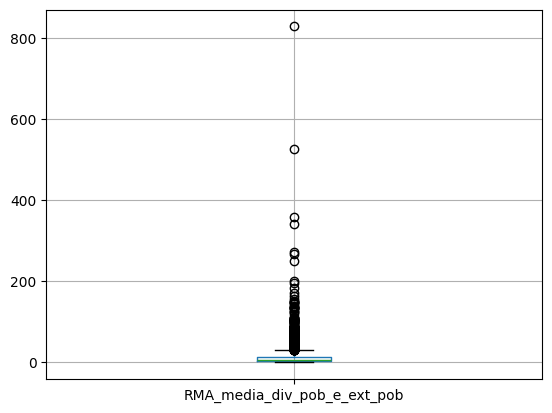

In [103]:
dados[['RMA_media_div_pob_e_ext_pob']].boxplot()


In [104]:
indice_max = dados['RMA_media_div_pob_e_ext_pob'].idxmax()
linha_max = dados['RMA_media_div_pob_e_ext_pob'].loc[indice_max]
linha_max

827.6562500000001

In [105]:
maiores_valores = dados['RMA_media_div_pob_e_ext_pob'].nlargest(10)
menores_valores = dados['RMA_media_div_pob_e_ext_pob'].nsmallest(10)

In [106]:
maiores_valores

5098    827.656250
4988    525.000000
4720    357.297297
5022    340.612245
5059    272.000000
4502    267.051282
3637    249.787234
4927    200.000000
4967    196.106870
5060    182.666667
Name: RMA_media_div_pob_e_ext_pob, dtype: float64

In [107]:
menores_valores

575     0.0
605     0.0
701     0.0
739     0.0
1031    0.0
1502    0.0
1662    0.0
2061    0.0
2230    0.0
2333    0.0
Name: RMA_media_div_pob_e_ext_pob, dtype: float64

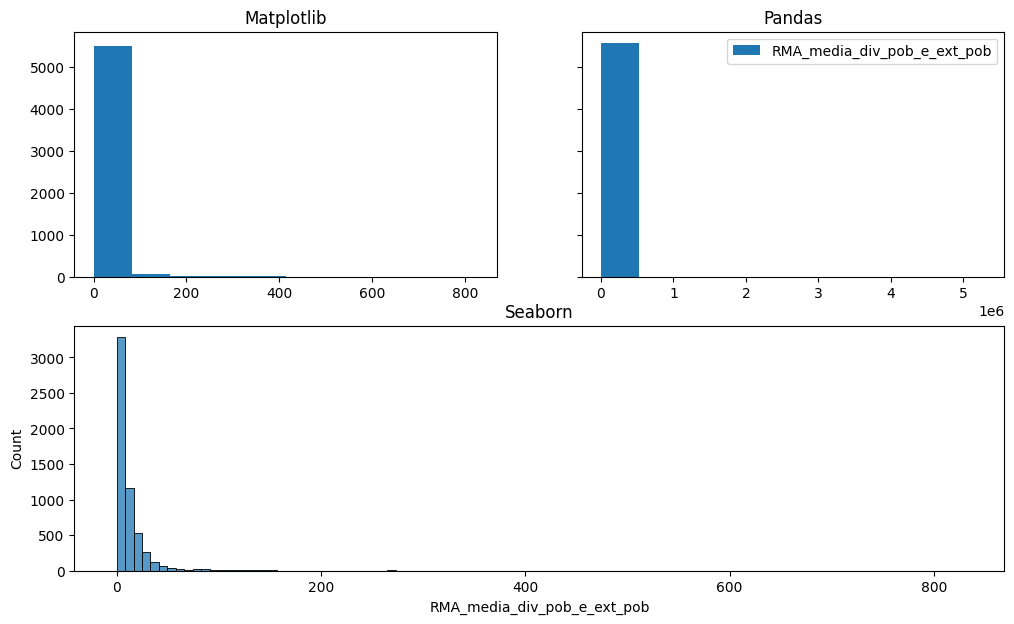

In [108]:
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Matplotlib')
ax1.hist(x=dados['RMA_media_div_pob_e_ext_pob']);

ax2 = plt.subplot(2, 2, 2, sharey=ax1)
ax2.set_title('Pandas')
dados.plot.hist(column='RMA_media_div_pob_e_ext_pob', bins=10, ax=ax2);

ax3 = plt.subplot(2, 1, 2)
plt.title('Seaborn')

sns.histplot(data=dados, x='RMA_media_div_pob_e_ext_pob', 
             multiple='stack', bins=100, ax=ax3);
             

In [109]:
dados['indice'] = pd.cut(dados['RMA_media_div_pob_e_ext_pob'], bins = [-1, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 850])

In [110]:
indice_11c = dados['indice'].value_counts()
indice_11c = pd.DataFrame(indice_11c).sort_values(by='indice')
indice_11c 

,count
indice,
"(-1, 0]",69
"(0, 5]",2324
"(5, 10]",1232
"(10, 15]",673
"(15, 20]",431
"(20, 25]",242
"(25, 30]",170
"(30, 35]",120
"(35, 40]",61


In [111]:
df_indice_RMA = indice_11c.reset_index(drop=False).copy()
df_indice_RMA

,indice,count
0,"(-1, 0]",69
1,"(0, 5]",2324
2,"(5, 10]",1232
3,"(10, 15]",673
4,"(15, 20]",431
5,"(20, 25]",242
6,"(25, 30]",170
7,"(30, 35]",120
8,"(35, 40]",61
9,"(40, 45]",59


In [112]:
df_indice_RMA['Classe'] = [0,1,2,3,4,5,6,7,8,9,10,11]
df_indice_RMA

,indice,count,Classe
0,"(-1, 0]",69,0
1,"(0, 5]",2324,1
2,"(5, 10]",1232,2
3,"(10, 15]",673,3
4,"(15, 20]",431,4
5,"(20, 25]",242,5
6,"(25, 30]",170,6
7,"(30, 35]",120,7
8,"(35, 40]",61,8
9,"(40, 45]",59,9


C:\Users\aline\AppData\Local\Temp\ipykernel_9744\3422903767.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0','0','5-10','15-20','25-30','35-40','45-50'],


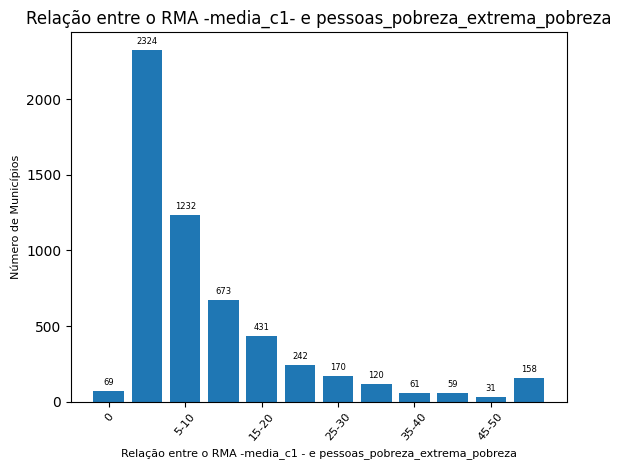

In [113]:
fig10c, ax = plt.subplots()

X = df_indice_RMA['Classe']
Y = df_indice_RMA['count']
bars = ax.bar(X, Y)

plt.title('Relação entre o RMA -media_c1- e pessoas_pobreza_extrema_pobreza')

ax.set_xlabel('Relação entre o RMA -media_c1 - e pessoas_pobreza_extrema_pobreza', fontsize=8)
ax.set_ylabel('Número de Municípios', fontsize=8)

ax.set_xticklabels(['0','0','5-10','15-20','25-30','35-40','45-50'],
                   rotation=90, fontsize=6)

# Adicione etiquetas em todas as barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Deslocamento vertical das etiquetas
                textcoords="offset points",
                ha='center', va='bottom', fontsize=6
               )
plt.xticks(rotation=50, fontsize=8)

plt.show()


In [114]:
dados.sort_values(by='Dez_tot_pes_pob_e_ext_pob')

,ibge_6,ibge_7,municipio_aj,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,Porte,RMA_media_div_pob_e_ext_pob,indice
4988,431805,4318051.0,São Domingos do Sul,1.0,462.0,42.0,8,Pequeno I,525.000000,"(50, 850]"
5060,432163,4321634.0,Três Arroios,1.0,329.0,27.4,15,Pequeno I,182.666667,"(50, 850]"
4861,431235,4312351.0,Montauri,1.0,257.0,21.4,20,Pequeno I,107.000000,"(50, 850]"
4767,430786,4307864.0,Fagundes Varela,1.0,304.0,25.3,24,Pequeno I,105.416667,"(50, 850]"
4927,431475,4314753.0,Poço Das Antas,1.0,600.0,50.0,25,Pequeno I,200.000000,"(50, 850]"
...,...,...,...,...,...,...,...,...,...,...
2162,292740,2927408.0,Salvador,28.0,102224.0,8518.7,755360,Metrópole,1.127767,"(0, 5]"
111,130260,1302603.0,Manaus,20.0,350503.0,29208.6,759304,Metrópole,3.846760,"(0, 5]"
949,230440,2304400.0,Fortaleza,27.0,738816.0,61568.0,884975,Metrópole,6.957033,"(5, 10]"
3242,330455,3304557.0,Rio de Janeiro,47.0,1455179.0,121264.9,1469913,Metrópole,8.249801,"(5, 10]"


In [115]:
dados[(dados['ibge_7']==5300108)]

,ibge_6,ibge_7,municipio_aj,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,Porte,RMA_media_div_pob_e_ext_pob,indice
5569,530010,5300108.0,Brasília,29.0,300262.0,27296.5,500738,Metrópole,5.451254,"(5, 10]"


In [116]:
dados[(dados['ibge_7']==1100015)]

,ibge_6,ibge_7,municipio_aj,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,Porte,RMA_media_div_pob_e_ext_pob,indice
0,110001,1100015.0,Alta Floresta D´oeste,1.0,14165.0,1180.4,5508,Pequeno II,21.430646,"(20, 25]"


In [117]:
dadosPorte=pd.merge(dados,df_indice_RMA, how='inner')
dadosPorte=dadosPorte.drop(columns={'count'}).rename(columns={'indice':'faixa'})
dadosPorte.sort_values(by='RMA_media_div_pob_e_ext_pob')[-360:-355]

,ibge_6,ibge_7,municipio_aj,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,Porte,RMA_media_div_pob_e_ext_pob,faixa,Classe
5378,430390,4303905.0,Campo Bom,2.0,9212.0,767.7,2346,Médio,32.723785,"(30, 35]",7
5317,350620,3506201.0,Bento de Abreu,1.0,2059.0,205.9,628,Pequeno I,32.786624,"(30, 35]",7
5374,421850,4218509.0,Treze Tílias,1.0,1200.0,100.0,305,Pequeno I,32.786885,"(30, 35]",7
5334,355535,3555356.0,Ubarana,1.0,3801.0,316.8,964,Pequeno I,32.863071,"(30, 35]",7
5357,420220,4202206.0,Benedito Novo,1.0,1978.0,164.8,500,Pequeno I,32.960000,"(30, 35]",7


In [118]:
dadosPorte.to_csv('data/dadosPorte_classe.csv',encoding = 'UTF-8')

In [119]:
dadosPorte.columns

Index(['ibge_6', 'ibge_7', 'municipio_aj', 'total_max_cras', 'soma_c1',
       'media_c1', 'Dez_tot_pes_pob_e_ext_pob', 'Porte',
       'RMA_media_div_pob_e_ext_pob', 'faixa', 'Classe'],
      dtype='object')

In [120]:
georreferenciamento_df = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv')

#os dados de georreferenciamento tem 7 dígitos (vamos remover o dígito verificador e atualizar o dataframe)
georreferenciamento_df['codigo_ibge'] = georreferenciamento_df['codigo_ibge'].astype('str').map(lambda x: x[:-1]).astype('int')


In [121]:
#cruzamento do dataframe resultados com as informações de georreferenciamento
pd_indiceRMA_geo = pd.merge(dadosPorte[['ibge_6','RMA_media_div_pob_e_ext_pob','Classe']],
                         georreferenciamento_df[['codigo_ibge', 'nome', 'latitude', 'longitude']],
                         left_on='ibge_6',
                         right_on='codigo_ibge',
                         how='inner')

In [122]:
pd_indiceRMA_geo

,ibge_6,RMA_media_div_pob_e_ext_pob,Classe,codigo_ibge,nome,latitude,longitude
0,110001,21.430646,5,110001,Alta Floresta D'Oeste,-11.9283,-61.9953
1,110007,24.524766,5,110007,Corumbiara,-12.9551,-60.8947
2,110012,24.857790,5,110012,Ji-Paraná,-10.8777,-61.9322
3,110037,24.989792,5,110037,Alto Alegre dos Parecis,-12.1320,-61.8350
4,110160,20.261780,5,110160,Theobroma,-10.2483,-62.3538
...,...,...,...,...,...,...,...
5565,520480,39.248886,8,520480,Campo Alegre de Goiás,-17.6363,-47.7768
5566,521540,35.075000,8,521540,Ouro Verde de Goiás,-16.2181,-49.1942
5567,521645,36.371134,8,521645,Perolândia,-17.5258,-52.0650
5568,521805,38.272358,8,521805,Porteirão,-17.8143,-50.1653


In [123]:
pd_indiceRMA_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ibge_6                       5570 non-null   int64  
 1   RMA_media_div_pob_e_ext_pob  5570 non-null   float64
 2   Classe                       5570 non-null   int64  
 3   codigo_ibge                  5570 non-null   int32  
 4   nome                         5570 non-null   object 
 5   latitude                     5570 non-null   float64
 6   longitude                    5570 non-null   float64
dtypes: float64(3), int32(1), int64(2), object(1)
memory usage: 283.0+ KB


In [124]:
import requests
geojson = requests.get(f'http://servicodados.ibge.gov.br/api/v3/malhas/paises/BR?formato=application/vnd.geo+json&qualidade=minima&intrarregiao=municipio').json()


In [125]:
#a malha geográfica do ibge tem 7 dígitos (vamos remover o dígito verificador e atualizar a malha)
from geojson_rewind import rewind
for feature in geojson['features']:
    feature['properties']['codarea'] = feature['properties']['codarea'][:-1]
geojson = rewind(geojson, rfc7946=False)

In [126]:

#construir o mapa choroplético com timeline no campo de ano
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

fig = px.choropleth(pd_indiceRMA_geo,
                    geojson=geojson,
                    scope='south america',
                    color='Classe',
                    color_continuous_scale="Reds",
                    locations='codigo_ibge',
                    featureidkey='properties.codarea',
                    hover_name='nome').update_layout(height=800, width=1000, autosize=False)

fig.update_traces(marker_line_width=0)

fig.show()

In [127]:
regioes = pd.read_json('data\municipios-poligonos.json')#este arquivo foi utilizado para relacionar o código IBGE com os estados e regiõ

In [128]:
regioes['ibge_6'] = regioes['municipioCodigo'].apply(lambda x: int(str(x)[:6]))

In [129]:
regioes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   _id                       5567 non-null   object
 1   ufCodigo                  5567 non-null   int64 
 2   ufNome                    5567 non-null   object
 3   ufSigla                   5567 non-null   object
 4   mesorregiaoCodigo         5567 non-null   int64 
 5   mesorregiaoNome           5567 non-null   object
 6   microrregiaoCodigo        5567 non-null   int64 
 7   microrregiaoNome          5567 non-null   object
 8   municipioCodigo           5567 non-null   int64 
 9   municipioCodigoAbreviado  5567 non-null   int64 
 10  municipioNome             5567 non-null   object
 11  poligono                  5567 non-null   object
 12  kmlBrasil                 5567 non-null   object
 13  ibge_6                    5567 non-null   int64 
dtypes: int64(6), object(8)
m

In [130]:
regioes_limpa = regioes.drop(['_id','mesorregiaoCodigo','mesorregiaoNome','microrregiaoCodigo','microrregiaoNome','municipioCodigo','municipioCodigoAbreviado','municipioNome', 'kmlBrasil'], axis=1)

In [131]:
df_RMA_completa = pd.merge(dadosPorte,regioes_limpa, how='left')

In [132]:
df_RMA_completa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ibge_6                       5570 non-null   int64   
 1   ibge_7                       5570 non-null   float64 
 2   municipio_aj                 5570 non-null   object  
 3   total_max_cras               5570 non-null   float64 
 4   soma_c1                      5570 non-null   float64 
 5   media_c1                     5570 non-null   float64 
 6   Dez_tot_pes_pob_e_ext_pob    5570 non-null   int64   
 7   Porte                        5570 non-null   object  
 8   RMA_media_div_pob_e_ext_pob  5570 non-null   float64 
 9   faixa                        5570 non-null   category
 10  Classe                       5570 non-null   int64   
 11  ufCodigo                     5567 non-null   float64 
 12  ufNome                       5567 non-null   object  
 13  ufS

In [133]:
df_RMA_completa[df_RMA_completa['ufCodigo'].isna()]

,ibge_6,ibge_7,municipio_aj,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,Porte,RMA_media_div_pob_e_ext_pob,faixa,Classe,ufCodigo,ufNome,ufSigla,poligono
2692,240020,2400208.0,Açu,2.0,4471.0,372.6,26443,Médio,1.409069,"(0, 5]",1,NaN,NaN,NaN,NaN
2703,240130,2401305.0,Augusto Severo,1.0,209.0,17.4,6610,Pequeno I,0.263238,"(0, 5]",1,NaN,NaN,NaN,NaN
2742,240530,2405306.0,Januário Cicco,1.0,337.0,28.1,5298,Pequeno I,0.530389,"(0, 5]",1,NaN,NaN,NaN,NaN


In [134]:
df_RMA_completa['ufCodigo'] = df_RMA_completa['ufCodigo'].fillna(24)
df_RMA_completa['ufNome'] = df_RMA_completa['ufNome'].fillna('Rio Grande do Norte')
df_RMA_completa['ufSigla'] = df_RMA_completa['ufSigla'].fillna('RN')
df_RMA_completa['ufCodigo'] = df_RMA_completa['ufCodigo'].astype(str)


In [135]:
df_RMA_completa.head()

,ibge_6,ibge_7,municipio_aj,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,Porte,RMA_media_div_pob_e_ext_pob,faixa,Classe,ufCodigo,ufNome,ufSigla,poligono
0,110001,1100015.0,Alta Floresta D´oeste,1.0,14165.0,1180.4,5508,Pequeno II,21.430646,"(20, 25]",5,11.0,Rondônia,RO,"{'type': 'MultiPolygon', 'coordinates': [[[[-6..."
1,110007,1100072.0,Corumbiara,1.0,4397.0,366.4,1494,Pequeno I,24.524766,"(20, 25]",5,11.0,Rondônia,RO,"{'type': 'MultiPolygon', 'coordinates': [[[[-6..."
2,110012,1100122.0,Ji-paraná,4.0,54012.0,4501.0,18107,Grande,24.857790,"(20, 25]",5,11.0,Rondônia,RO,"{'type': 'MultiPolygon', 'coordinates': [[[[-6..."
3,110037,1100379.0,Alto Alegre Dos Parecis,1.0,7344.0,612.0,2449,Pequeno I,24.989792,"(20, 25]",5,11.0,Rondônia,RO,"{'type': 'MultiPolygon', 'coordinates': [[[[-6..."
4,110160,1101609.0,Theobroma,1.0,5108.0,425.7,2101,Pequeno I,20.261780,"(20, 25]",5,11.0,Rondônia,RO,"{'type': 'MultiPolygon', 'coordinates': [[[[-6..."


In [136]:
df_RMA_completa['Município_UF'] = df_RMA_completa.apply(lambda row:f'{row["municipio_aj"]} - {row["ufSigla"]}', axis=1)

In [137]:
df_RMA_completa

,ibge_6,ibge_7,municipio_aj,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,Porte,RMA_media_div_pob_e_ext_pob,faixa,Classe,ufCodigo,ufNome,ufSigla,poligono,Município_UF
0,110001,1100015.0,Alta Floresta D´oeste,1.0,14165.0,1180.4,5508,Pequeno II,21.430646,"(20, 25]",5,11.0,Rondônia,RO,"{'type': 'MultiPolygon', 'coordinates': [[[[-6...",Alta Floresta D´oeste - RO
1,110007,1100072.0,Corumbiara,1.0,4397.0,366.4,1494,Pequeno I,24.524766,"(20, 25]",5,11.0,Rondônia,RO,"{'type': 'MultiPolygon', 'coordinates': [[[[-6...",Corumbiara - RO
2,110012,1100122.0,Ji-paraná,4.0,54012.0,4501.0,18107,Grande,24.857790,"(20, 25]",5,11.0,Rondônia,RO,"{'type': 'MultiPolygon', 'coordinates': [[[[-6...",Ji-paraná - RO
3,110037,1100379.0,Alto Alegre Dos Parecis,1.0,7344.0,612.0,2449,Pequeno I,24.989792,"(20, 25]",5,11.0,Rondônia,RO,"{'type': 'MultiPolygon', 'coordinates': [[[[-6...",Alto Alegre Dos Parecis - RO
4,110160,1101609.0,Theobroma,1.0,5108.0,425.7,2101,Pequeno I,20.261780,"(20, 25]",5,11.0,Rondônia,RO,"{'type': 'MultiPolygon', 'coordinates': [[[[-6...",Theobroma - RO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,520480,5204805.0,Campo Alegre de Goiás,1.0,7399.0,616.6,1571,Pequeno I,39.248886,"(35, 40]",8,52.0,Goiás,GO,"{'type': 'MultiPolygon', 'coordinates': [[[[-4...",Campo Alegre de Goiás - GO
5566,521540,5215405.0,Ouro Verde de Goiás,1.0,5051.0,420.9,1200,Pequeno I,35.075000,"(35, 40]",8,52.0,Goiás,GO,"{'type': 'MultiPolygon', 'coordinates': [[[[-4...",Ouro Verde de Goiás - GO
5567,521645,5216452.0,Perolândia,1.0,2117.0,176.4,485,Pequeno I,36.371134,"(35, 40]",8,52.0,Goiás,GO,"{'type': 'MultiPolygon', 'coordinates': [[[[-5...",Perolândia - GO
5568,521805,5218052.0,Porteirão,1.0,6779.0,564.9,1476,Pequeno I,38.272358,"(35, 40]",8,52.0,Goiás,GO,"{'type': 'MultiPolygon', 'coordinates': [[[[-5...",Porteirão - GO


In [138]:
def categorize_uf_code(code):
    if code.startswith('1'):
        return 'Norte'
    elif code.startswith('2'):
        return 'Nordeste'
    elif code.startswith('3'):
        return 'Sudeste'
    elif code.startswith('4'):
        return 'Sul'
    else:
        return 'Centro-Oeste'
df_RMA_completa['Região'] = df_RMA_completa['ufCodigo'].apply(categorize_uf_code)

In [139]:
df_RMA_completa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ibge_6                       5570 non-null   int64   
 1   ibge_7                       5570 non-null   float64 
 2   municipio_aj                 5570 non-null   object  
 3   total_max_cras               5570 non-null   float64 
 4   soma_c1                      5570 non-null   float64 
 5   media_c1                     5570 non-null   float64 
 6   Dez_tot_pes_pob_e_ext_pob    5570 non-null   int64   
 7   Porte                        5570 non-null   object  
 8   RMA_media_div_pob_e_ext_pob  5570 non-null   float64 
 9   faixa                        5570 non-null   category
 10  Classe                       5570 non-null   int64   
 11  ufCodigo                     5570 non-null   object  
 12  ufNome                       5570 non-null   object  
 13  ufS

In [140]:
df_RMA_completa.describe()

,ibge_6,ibge_7,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,RMA_media_div_pob_e_ext_pob,Classe
count,5570.000000,5.570000e+03,5570.000000,5.570000e+03,5570.000000,5.570000e+03,5570.000000,5570.000000
mean,325358.627828,3.217260e+06,1.531957,7.452582e+03,629.049569,1.078205e+04,11.867292,2.633393
std,98491.033878,1.031019e+06,2.060009,3.228650e+04,2695.373758,4.574598e+04,22.531713,2.341372
min,110001.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,8.000000e+00,0.000000,0.000000
25%,251212.500000,2.508027e+06,1.000000,1.154250e+03,100.825000,1.528750e+03,2.573039,1.000000
50%,314627.500000,3.142956e+06,1.000000,2.413500e+03,209.150000,3.851000e+03,6.335638,2.000000
75%,411918.750000,4.117212e+06,1.000000,5.152250e+03,438.900000,9.535750e+03,13.906144,3.000000
max,530010.000000,5.300108e+06,54.000000,1.455179e+06,121264.900000,2.151551e+06,827.656250,11.000000


In [141]:
df_RMA_completa.to_csv('data/df_RMA_completa.csv',encoding = 'UTF-8')